## 三角脉冲、矩形脉冲

### 导入模块

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

### 三角脉冲

生成 2 秒的三角形脉冲，采样率为 10 kHz，宽度为 20 ms。对一个矩形脉冲进行重复计算。

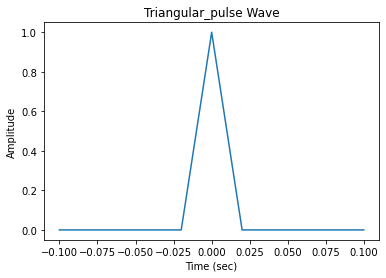

In [3]:
def triangular_pulse(start, end, width, step):
    xout = []
    yout = []
    #for x in range(-width, width, step):
    for x in range(start, end, step):
     if start<x<2*width:
      x = np.arange(start, 2*width, step)
      xout=x
      y = np.where(x >= width, 2*width - x, x)
      yout=y
     else:
      xout = np.append(xout,x)
      yout = np.append(yout,0)
    return xout, yout
#Input known waveform and sampling information
fs = 10000  #sampling frequency
width = 200 #20ms has 200 points
end = 1200 #0.1s has 20000 points,in the example, only the waveform of the first 0.1 second is displayed
start = 0
step = 1
a,b = triangular_pulse(start,end,width,step)
xi = np.arange(-800,0)#Add waveform with negative part
yi = np.zeros(800)
xo = np.append(xi,a)
yo = np.append(yi,b)
x = xo/10000-0.02 #Convert the sample point value into time value and function value
y = yo/200
#Draw the waveform
plt.title('Triangular_pulse Wave')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.plot(x, y)

### 矩形脉冲

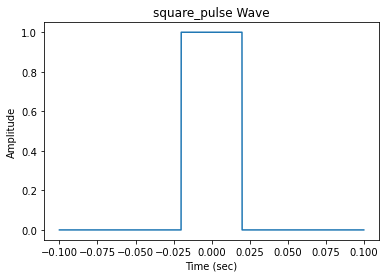

In [4]:
def square_pulse(start, end, width, step):
    xout = []
    yout = []
    #for x in range(-width, width, step):
    for x in range(start, end, step):
     if start<x<width:
      x = np.arange(start, width, step)
      xout=x
      yout= np.ones(width)

     else:
      xout = np.append(xout,x)
      yout = np.append(yout,0)
    return xout, yout
#Input known waveform and sampling information
fs = 10000  #sampling frequency
width = 400 #20ms has 200 points
end = 1200 #0.1s has 20000 points,in the example, only the waveform of the first 0.1 second is displayed
start = 0
step = 1
a,b = square_pulse(start,end,width,step)
xi = np.arange(-800,0)#Add waveform with negative part
yi = np.zeros(800)
xo = np.append(xi,a)
yo = np.append(yi,b)
x = xo/10000-0.02 #Convert the sample point value into time value and function value
y = yo
#Draw the waveform
plt.title('square_pulse Wave')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.plot(x, y)

### 拓展：高斯调制正弦脉冲

gauspuls 函数使用指定时间、中心频率和小数带宽生成高斯调制正弦脉冲。

sinc 函数计算输入向量或矩阵的数学正弦函数。正弦函数是宽度为 2π，高度为单位高度的矩形脉冲的连续傅里叶逆变换。

生成带宽为 60%、采样率为 1 MHz 的 50 kHz 高斯 RF 脉冲。当包络比峰值低 40 dB 时，截断脉冲。

Text(0.5, 1.0, 'Gaussian Pulse')

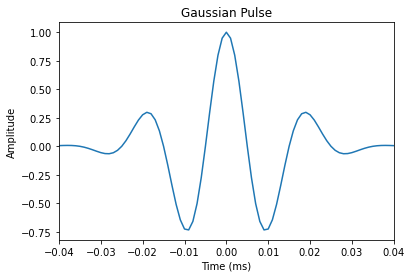

In [5]:
t = np.linspace(-0.04, 0.04, 80000, endpoint=False)
y1 = signal.gausspulse(t, fc=50000, bw=0.6, bwr=- 6, tpr=- 40, retquad=False, retenv=False)
plt.plot(t*1e3,y1)
plt.xlim((-0.04,0.04))
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Gaussian Pulse')